# Proyecto Computacional #1: Beaming y Efecto Doppler Relativista
## Astrofisica Moderna
###Santiago Andres Orjuela M.
C.C. 1006508118

In [ ]:
!git clone https://github.com/Santiago-Orjuela/Archivos.git

fatal: destination path 'Archivos' already exists and is not an empty directory.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import constants

In [ ]:
url1 = '/content/Archivos/cma_data.csv'
url2 = '/content/Archivos/colors.csv'
cma_data = pd.read_csv(url1)
cinf = pd.read_csv(url2)

In [ ]:
cma_data

,index,ra,dec,lam
0,1,101.288541,-16.713143,601
1,2,104.656445,-28.972089,601
2,3,107.097859,-26.393208,701
3,4,95.674948,-17.955917,601
4,5,111.023771,-29.303120,601
5,6,95.078280,-30.063377,601
6,7,105.756140,-23.833301,601
7,8,105.429799,-27.934842,774
8,9,102.460273,-32.508488,601
9,10,103.533145,-24.184223,774


In [ ]:
c = 1 #velocidad de la luz
vn = 0.4 #velocidad nave
RAs0 = np.array(cma_data['ra'])
Decs0 = np.array(cma_data['dec'])
λems = np.array(cma_data['lam'])

#Direccion de la Nave
RAn = np.mean(RAs0)
Decn =  np.mean(Decs0)

deg = np.pi/180
rad = 1/deg

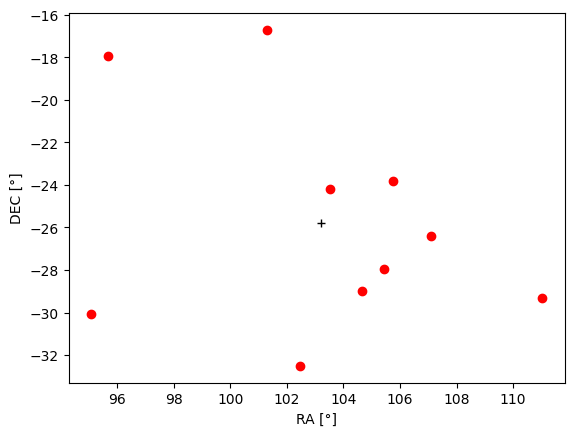

Direccion de la Nave: RA = 103.20°, DEC = -25.79°


In [ ]:
plt.plot(RAs0, Decs0,'ro')
plt.plot(RAn, Decn,'k+')
plt.xlabel('RA [°]')
plt.ylabel('DEC [°]')
plt.show()
print(f'Direccion de la Nave: RA = {RAn:.2f}°, DEC = {Decn:.2f}°')

### 1)

In [ ]:
def ColimacionR(θ, v):
  #Pasamos a radianes
  θr = θ*deg

  #Factor de Lorentz
  β = v / c
  γ = 1 / (1 - β**2)**0.5

  #Angulo visto desde la nave
  θn = np.arctan( np.sin(θr)/ (γ * (np.cos(θr) + β)))

  return θn*rad

#Para encontrar las coordenadas colimadas haremos uso de trogonometria esferica
def CoordsColimadas(RAestrella, DECestrella, v, RAcentro, DECcentro):

  #Lados del triangulo esferico (Grados):
  a = 90 - DECcentro
  b = 90 - DECestrella

  C = np.abs(RAcentro - RAestrella)

  #Empleando teorema del coseno para c
  #Angulo observado por el observador en Tierra (radianes)
  c = np.arccos(np.cos(a*deg) * np.cos(b*deg) + \
                np.sin(a*deg) * np.sin(b*deg)* np.cos(C*deg))

  #Encontramos el angulo A por teorema del seno (radianes)
  A = np.arcsin( (np.sin(a*deg) * np.sin(C*deg))/np.sin(c) )

  #C colimado
  cco = ColimacionR(c*rad,v) #grados

  Cco = np.arcsin( (np.sin(cco*deg) * np.sin(A)) /( np.sin(a*deg))) #radianes

  #Ascencion Recta Colimada (grados)
  if RAcentro < RAestrella:
    RAco = np.abs(RAcentro + (Cco*rad) )
  else:
    RAco = np.abs(RAcentro - (Cco*rad) )

  #Declinacion Colimada
  if DECestrella > DECcentro:
    An = 180 - (A*rad)

    bco = np.abs( np.arcsin((np.cos(cco*deg) - (np.cos(a*deg)**2 / \
                                               np.cos(cco*deg))) / \
                    (np.sin(a*deg) * np.cos(Cco) - np.cos(a*deg) * \
                     np.tan(cco*deg) * np.cos(An*deg))) ) *rad

    DECco = -(bco - 90) #Grados

  else:
    #Usando analogia de Neper para encontrar b
    bco = np.abs(2 * np.arctan((np.cos((Cco + A)/2) / (np.cos(((Cco - A)/2))))*\
                 (np.tan(((a*deg) + (cco*deg))/2)))) *rad

    DECco = (bco - 90) #Grados

  return RAco, -DECco, cco

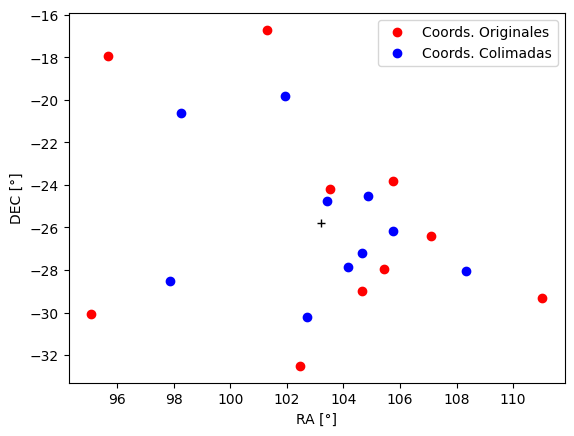

In [ ]:
N = len(cma_data['index'])
RAsp = np.zeros_like(RAs0)
Decsp = np.zeros_like(Decs0)
sa = np.zeros(N) #Separacion angular

for i in range(N):
  RAsp[i], Decsp[i], sa[i] = CoordsColimadas(RAs0[i],Decs0[i],vn,RAn,Decn)

plt.plot(RAs0, Decs0,'ro', label = 'Coords. Originales')
plt.plot(RAsp, Decsp,'bo', label = 'Coords. Colimadas')
plt.plot(RAn, Decn,'k+')
plt.xlabel('RA [°]')
plt.ylabel('DEC [°]')
plt.legend()
plt.show()


### 2)

In [ ]:
def DopplerR(λem, θ, v):
  #Pasamos a radianes
  θr = θ*deg

  #Factor de Lorentz
  β = v / c
  γ = 1 / (1 - β**2)**0.5

  λobs = λem * γ * (1 - β * np.cos(θr))

  return λobs

In [ ]:
λobss = [ DopplerR(λems[i], sa[i], vn) for i in range(N)]
λp = pd.DataFrame({ 'lam' : λobss })

In [ ]:
lamround = 5*round(cma_data.lam/5)
colors = [cinf.hex[cinf.lamc==i].iloc[0] for i in lamround]

In [ ]:
lamroundp = 5*round(λp.lam/5)
colorsp = [cinf.hex[cinf.lamc==i].iloc[0] for i in lamroundp]
colorsp

['#3200ff',
 '#3200ff',
 '#0b00ff',
 '#3200ff',
 '#3200ff',
 '#3200ff',
 '#3200ff',
 '#00ff6f',
 '#3200ff',
 '#00ff6f']

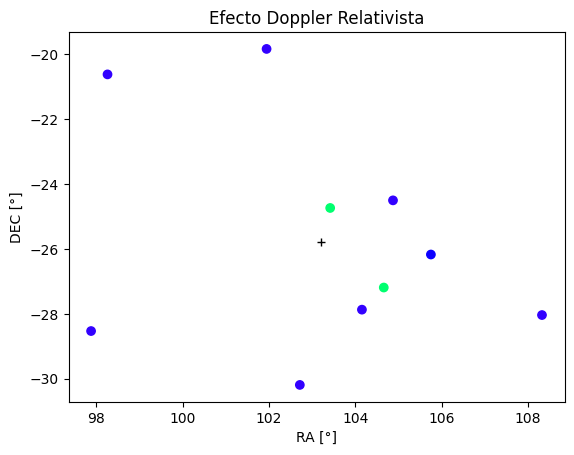

In [ ]:
plt.scatter(RAsp, Decsp, c = colorsp, label = 'Coords. Colimadas')
plt.plot(RAn, Decn,'k+')
plt.xlabel('RA [°]')
plt.ylabel('DEC [°]')
plt.title('Efecto Doppler Relativista')
plt.show()

### 3)

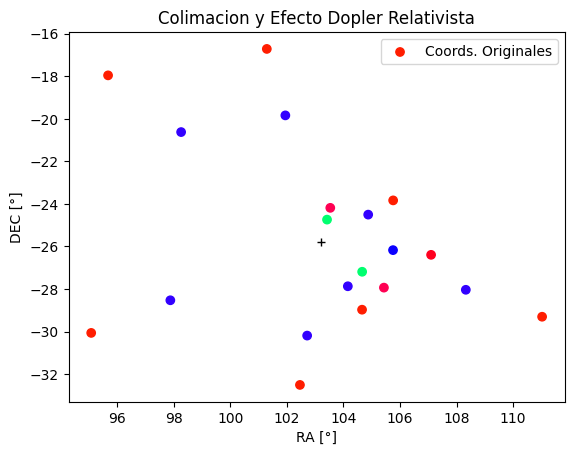

In [ ]:
plt.scatter(RAs0, Decs0,c = colors, label = 'Coords. Originales')
plt.scatter(RAsp, Decsp, c = colorsp)
plt.plot(RAn, Decn,'k+')
plt.xlabel('RA [°]')
plt.ylabel('DEC [°]')
plt.title('Colimacion y Efecto Dopler Relativista')
plt.legend()
plt.show()

### 4)

In [ ]:
vns = [0.1, 0.2, 0.3, 0.4]
N = len(cma_data['index'])

data = []
colorss = []

for vn in vns:
    RAsp = np.zeros_like(RAs0)
    Decsp = np.zeros_like(Decs0)
    sa = np.zeros(N)

    for j in range(N):
        RAsp[j], Decsp[j], sa[j] = CoordsColimadas(RAs0[j], Decs0[j], vn, RAn, Decn)
    data.append(np.array([RAsp, Decsp, sa]))

    λobss = [DopplerR(λems[k], sa[k], vn) for k in range(N)]
    lamroundp = 5 * np.round(np.array(λobss) / 5)
    colorsp = [cinf.hex[cinf.lamc == l].iloc[0] for l in lamroundp]
    colorss.append(colorsp)

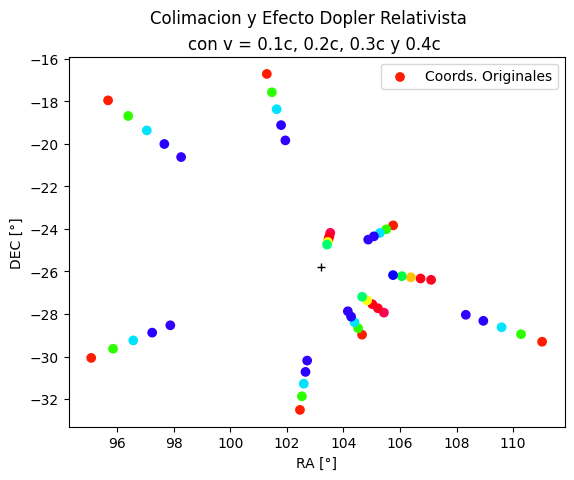

In [ ]:
plt.scatter(RAs0, Decs0,c = colors, label = 'Coords. Originales')
for i in range(len(vns)):
  plt.scatter(data[i][0], data[i][1], c = colorss[i])
plt.plot(RAn, Decn,'k+')
plt.xlabel('RA [°]')
plt.ylabel('DEC [°]')
plt.suptitle('Colimacion y Efecto Dopler Relativista')
plt.title( 'con v = 0.1c, 0.2c, 0.3c y 0.4c ')
plt.legend()
plt.show()